# Project: Investigate a Dataset - Football Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This is a dataset about European Football between 2008 and 2016. It has 7 tables:
<ol>
    <li>Country: It has the list of countries whose leagues are available</li>
    <li>Leagues: It has the leagues avaialable in the dataset</li>
    <li>Match: It has all the data about matches (home team, away team, score, players and their positions, statistics, bets)</li>
    <li>Player: It has the personal Information about players (name, birthday, height, weight)</li>
    <li>Player_Attribute: It has player attributes in Fifa games </li>
    <li>Team: It has information about teams (name, short name)</li>
    <li>Team_Attribute: It has team attributes in Fifa games</li>
</ol> 

### Question(s) for Analysis

<ol>
    <li>The top winning teams from 2008-2016</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sqlite3
%matplotlib inline

## 1. The top winning teams from 2008-2016

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
conn = sqlite3.connect("database.sqlite")
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type = 'table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [3]:
# Getting data for the first question "The top winning teams from 2008-2016"

query = """
        SELECT c.name  as country, l.name as league, m.season, ht.team_long_name as home_team, at.team_long_name as away_team, m.home_team_goal, m.away_team_goal
        FROM match as m join country as c on (m.country_id = c.id)
        join league as l on (m.league_id = l.id)
        join team as ht on (m.home_team_api_id = ht.team_api_id)
        join team as at on (m.away_team_api_id = at.team_api_id)
        """
matches = pd.read_sql(query, conn)
matches

,country,league,season,home_team,away_team,home_team_goal,away_team_goal
0,Belgium,Belgium Jupiler League,2008/2009,KRC Genk,Beerschot AC,1,1
1,Belgium,Belgium Jupiler League,2008/2009,SV Zulte-Waregem,Sporting Lokeren,0,0
2,Belgium,Belgium Jupiler League,2008/2009,KSV Cercle Brugge,RSC Anderlecht,0,3
3,Belgium,Belgium Jupiler League,2008/2009,KAA Gent,RAEC Mons,5,0
4,Belgium,Belgium Jupiler League,2008/2009,FCV Dender EH,Standard de Liège,1,3
...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,2015/2016,FC St. Gallen,FC Thun,1,0
25975,Switzerland,Switzerland Super League,2015/2016,FC Vaduz,FC Luzern,1,2
25976,Switzerland,Switzerland Super League,2015/2016,Grasshopper Club Zürich,FC Sion,2,0
25977,Switzerland,Switzerland Super League,2015/2016,Lugano,FC Zürich,0,0


In [4]:
# getting the start year to express the season
matches["season"] = matches["season"].str[:4]

In [5]:
# Adding a column to decide who is the winner, 1 = home win, 0 = draw, -1 = away win, + winner and loser team also
def results(row):
    if row["home_team_goal"] > row["away_team_goal"]:
        winner, loser, result = row["home_team"], row["away_team"], 1
    elif row["home_team_goal"] < row["away_team_goal"]:
        winner, loser, result = row["away_team"], row["home_team"], -1
    else :
        winner, loser, result = np.nan, np.nan, 0
    return winner, loser, result
matches[['winner', 'loser', 'result']] = matches.apply(lambda row: results(row), axis = 1, result_type = 'expand')
matches

,country,league,season,home_team,away_team,home_team_goal,away_team_goal,winner,loser,result
0,Belgium,Belgium Jupiler League,2008,KRC Genk,Beerschot AC,1,1,NaN,NaN,0.0
1,Belgium,Belgium Jupiler League,2008,SV Zulte-Waregem,Sporting Lokeren,0,0,NaN,NaN,0.0
2,Belgium,Belgium Jupiler League,2008,KSV Cercle Brugge,RSC Anderlecht,0,3,RSC Anderlecht,KSV Cercle Brugge,-1.0
3,Belgium,Belgium Jupiler League,2008,KAA Gent,RAEC Mons,5,0,KAA Gent,RAEC Mons,1.0
4,Belgium,Belgium Jupiler League,2008,FCV Dender EH,Standard de Liège,1,3,Standard de Liège,FCV Dender EH,-1.0
...,...,...,...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,2015,FC St. Gallen,FC Thun,1,0,FC St. Gallen,FC Thun,1.0
25975,Switzerland,Switzerland Super League,2015,FC Vaduz,FC Luzern,1,2,FC Luzern,FC Vaduz,-1.0
25976,Switzerland,Switzerland Super League,2015,Grasshopper Club Zürich,FC Sion,2,0,Grasshopper Club Zürich,FC Sion,1.0
25977,Switzerland,Switzerland Super League,2015,Lugano,FC Zürich,0,0,NaN,NaN,0.0


In [6]:
matches_5 = matches.query("country in ['Spain', 'England', 'Germany', 'France', 'Italy']")

In [7]:
# getting the performance of the clubs in each season in the 5 big leagues
successfull_seasons = pd.DataFrame({"count":matches_5[["season","winner","country"]].groupby(["winner", "season"]).size().sort_values()[-10:]})
successfull_seasons = successfull_seasons.reset_index()
successfull_seasons["name_season"] = successfull_seasons.apply(lambda row: "_".join([row["winner"], str(row["season"])]), axis = 1)
successfull_seasons

,winner,season,count,name_season
0,Juventus,2015,29,Juventus_2015
1,FC Barcelona,2014,30,FC Barcelona_2014
2,Real Madrid CF,2014,30,Real Madrid CF_2014
3,Paris Saint-Germain,2015,30,Paris Saint-Germain_2015
4,FC Barcelona,2010,30,FC Barcelona_2010
5,FC Barcelona,2009,31,FC Barcelona_2009
6,Real Madrid CF,2009,31,Real Madrid CF_2009
7,Real Madrid CF,2011,32,Real Madrid CF_2011
8,FC Barcelona,2012,32,FC Barcelona_2012
9,Juventus,2013,33,Juventus_2013


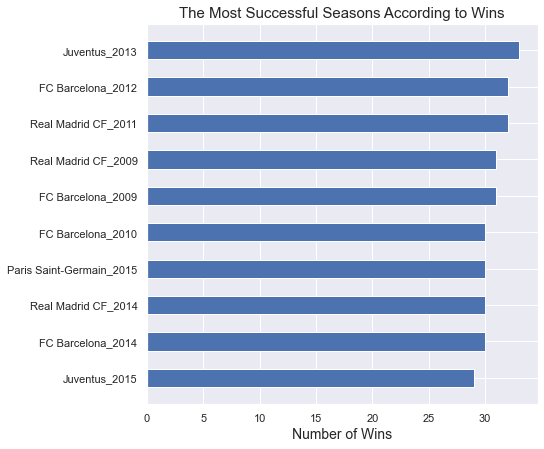

In [8]:
#plotting it
plt.figure(figsize=(7,7))
plt.barh(y=successfull_seasons["name_season"]
        ,width=successfull_seasons["count"]
        ,height=0.5)
plt.title("The Most Successful Seasons According to Wins", fontsize=15)
plt.xlabel("Number of Wins", fontsize=14)
plt.show()

Another thing I want to check is the best 5 clubs at winning overall, then checking there every season's record

In [9]:
# The 10 most winning teams
most_10w = matches_5.groupby("winner")["winner"].count().sort_values()[-10:]
most_10w

winner
Atlético Madrid        167
Arsenal                170
Paris Saint-Germain    175
Manchester City        175
Chelsea                176
Juventus               189
Manchester United      192
FC Bayern Munich       193
Real Madrid CF         228
FC Barcelona           234
Name: winner, dtype: int64

In [10]:
# The 5 most winning teams
most_5w = matches_5.groupby("winner")["winner"].count().sort_values()[-5:]
most_5w

winner
Juventus             189
Manchester United    192
FC Bayern Munich     193
Real Madrid CF       228
FC Barcelona         234
Name: winner, dtype: int64

In [11]:
# Getting the record of every season for the top 5 clubs
x= matches_5.query("winner in @most_5w.index").groupby(["winner", "season"]).count()["result"]
values = x.values
clubs = []
years = []
for i in x.index:
    if i[0] not in clubs:
        clubs.append(i[0])
    if i[1] not in years:
        years.append(i[1])
best_5 = pd.DataFrame(data = values.reshape(len(clubs), len(years)), columns = years, index = clubs).T
best_5

,FC Barcelona,FC Bayern Munich,Juventus,Manchester United,Real Madrid CF
2008,27,20,21,28,25
2009,31,20,16,27,31
2010,30,19,15,23,29
2011,28,23,22,28,32
2012,32,29,27,28,26
2013,27,29,33,19,27
2014,30,25,26,20,30
2015,29,28,29,19,28


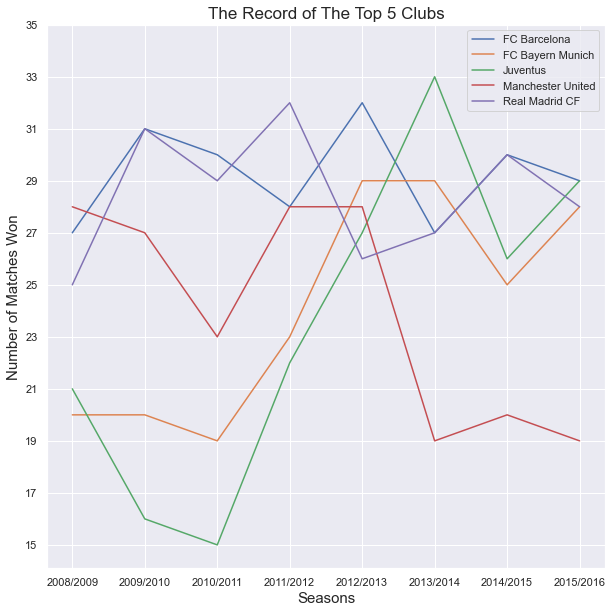

In [12]:
plt.figure(figsize=(10,10))
plt.plot(best_5)
plt.xticks(range(0,8),["2008/2009", "2009/2010", "2010/2011", "2011/2012", "2012/2013", "2013/2014", "2014/2015", "2015/2016"])
plt.yticks(range(15,36,2))
plt.ylabel("Number of Matches Won", fontsize=15)
plt.xlabel("Seasons", fontsize=15)
plt.title("The Record of The Top 5 Clubs", fontsize=17)
plt.legend(best_5.columns)
plt.show()

<a id='conclusions'></a>
## Conclusions

As shown above the best 5 clubs from 2008 to 2016 were FC Barcelona, Real Madrid CF, FC Bayern Munich, Manchester United, Juventus in order
but that wasn't constant through seasons except for FC Barcelona and Real Madrid CF who did well in almost the whole 8 seasons.
also Juventus being the most unstable club through seasons getting both the best and worst seasons.

#### Limitation
the main limitation actully would be using just the data of wins. while in real world results consider also draws and loses so 10 wins + a draw is better than 10 wins + a lose. that could be fixed if used points system in the analysis, but I intentionally targeted the statistics of just wins.
 
 #### Things to be done
 while looking at the top 10 clubs I found some interesting clubs starting to shine in the later 5 places (let down Arsenal) there were Chelsea, Manchester City, Paris Saint-Germain and Atlético Madrid. A furthere analysis could be done to track their progress.better up to date data would help.

In [13]:
from subprocess import call
command = f"jupyter nbconvert Investigate_a_Dataset.ipynb --output Investigate_a_Dataset.html --to html"
call(command)

0